# Using the Wine recognition Data Set

In [1]:
# Load the dataset
from sklearn.datasets import load_wine
wine = load_wine()

In [2]:
# Display a description of the dataset
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
# print the target variables
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
import numpy as np


print('Class labels:', np.unique(wine.target))

Class labels: [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              wine.data,               # features
                              wine.target,             # labels
                              test_size = 0.30,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = wine.target)  # randomize based on labels

In [6]:
print('Labels count in y:', np.bincount(wine.target))
print('Labels count in y_train:', np.bincount(train_labels))
print('Labels count in y_test:', np.bincount(test_labels))

Labels count in y: [59 71 48]
Labels count in y_train: [41 50 33]
Labels count in y_test: [18 21 15]


# No normalization (use raw features)

## Logistic Regression

In [7]:
from sklearn import linear_model
x = train_set[:,0:13]         
y = train_labels             

log_regress = linear_model.LogisticRegression(max_iter = 3000)
log_regress.fit(X = x, y = y)

LogisticRegression(max_iter=3000)

In [8]:
print(log_regress.intercept_)     #
print(log_regress.coef_)

[-11.09858682  18.62045778  -7.52187096]
[[ 4.51450483e-01  3.68239975e-01  3.02090397e-01 -3.93496098e-01
  -9.20431309e-03  4.10491162e-01  6.85078228e-01 -1.59753217e-03
   1.40398351e-01  1.20812597e-01  9.83218333e-03  5.07296733e-01
   1.10241867e-02]
 [-6.61409221e-01 -7.37187212e-01 -4.19765465e-01  2.71485439e-01
  -2.24512116e-02 -1.77214462e-01  4.04946895e-01  9.19563154e-02
   2.55332822e-01 -8.70885587e-01  3.08927077e-01  1.27412848e-01
  -1.03778457e-02]
 [ 2.09958739e-01  3.68947237e-01  1.17675068e-01  1.22010659e-01
   3.16555247e-02 -2.33276700e-01 -1.09002512e+00 -9.03587832e-02
  -3.95731172e-01  7.50072989e-01 -3.18759261e-01 -6.34709581e-01
  -6.46340973e-04]]


In [9]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["class_0", "class_1","class_2"]

#---get the predicted class labels---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

    class_0   class_1   class_2  Prediction  Original Result
0  0.000348  0.266504  0.733149           2                2
1  0.000015  0.077706  0.922279           2                2
2  0.000961  0.000023  0.999016           2                2
3  0.000447  0.999416  0.000137           1                1
4  0.000343  0.999632  0.000025           1                1


In [10]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1   2
row_0            
0      17   1   0
1       1  20   0
2       0   0  15


In [11]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true = test_labels,  # True labels
                               y_pred = preds))       # Predicted labels


[[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]


### Metrics

In [12]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_logre_nonorm = accuracy_score(test_labels, preds)
print('Accuracy : ' ,acc_logre_nonorm)

Accuracy :  0.9629629629629629


In [13]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_logre_nonorm = f1_score(test_labels, preds, average='weighted')
print('F1-Score : ',f1_logre_nonorm)

F1-Score :  0.9629629629629629


In [14]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_logre_nonorm = mean_squared_error(test_labels, preds)
print('Mean Squared Error : ', mse_logre_nonorm)

Mean Squared Error :  0.037037037037037035


In [15]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
y_true = test_labels
y_pred = preds
hamloss_logre_nonorm = hamming_loss(test_labels, preds)
print('Hamming Loss : ' ,hamloss_logre_nonorm)

Hamming Loss :  0.037037037037037035


## Perceptron

In [16]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(train_set, train_labels)

Perceptron(eta0=0.1, random_state=1)

### Model Evaluation

In [17]:
y_pred = ppn.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 24


### Metrics

In [18]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_perc_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' , acc_perc_nonorm)

Accuracy :  0.5555555555555556


In [19]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_perc_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_perc_nonorm)

F1-Score :  0.4668534080298786


In [20]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_perc_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared error : ', mse_perc_nonorm)

Mean Squared error :  0.6111111111111112


In [21]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_perc_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ', hamloss_perc_nonorm)

Hamming Loss :  0.4444444444444444


##  Support Vector Machines

### With Linear Kernel

In [22]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(train_set, train_labels)

SVC(kernel='linear', random_state=1)

### Model Evaluation

In [23]:
y_pred = svm.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 4


### Metrics

In [24]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_lk_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_lk_nonorm)

Accuracy :  0.9259259259259259


In [25]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_lk_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_svm_lk_nonorm)

F1-Score :  0.9251235106073815


In [26]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_lk_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ', mse_svm_lk_nonorm)

Mean Squared Error :  0.07407407407407407


In [27]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_lk_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_lk_nonorm)

Hamming Loss :  0.07407407407407407


### With RBF Kernel

In [28]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=1)
svm.fit(train_set, train_labels)

SVC(random_state=1)

### Model Evaluation

In [29]:
y_pred = svm.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 22


### Metrics

In [30]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_rbf_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_svm_rbf_nonorm)

Accuracy :  0.5925925925925926


In [31]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_rbf_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_svm_rbf_nonorm)

F1-score : 0.5985530391018196


In [32]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_rbf_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_rbf_nonorm)

Mean Squared Error :  0.5740740740740741


In [33]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_rbf_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_rbf_nonorm)

Hamming Loss :  0.4074074074074074


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree for classification tasks
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(train_set, train_labels)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Model Evaluation

In [35]:
y_pred = tree_model.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 2


### Metrics

In [36]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_dtree_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_dtree_nonorm)

Accuracy :  0.9629629629629629


In [37]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_dtree_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_dtree_nonorm)

F1-score : 0.9629629629629629


In [38]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_dtree_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_dtree_nonorm)

Mean Squared Error :  0.037037037037037035


In [39]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_dtree_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_dtree_nonorm)

Hamming Loss :  0.037037037037037035


# Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest comprised of 25 decision trees
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(train_set, train_labels)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

### Model Evaluation

In [41]:
y_pred = forest.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [42]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_rforest_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_rforest_nonorm)

Accuracy :  0.9814814814814815


In [43]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_rforest_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_rforest_nonorm)

F1-score : 0.9814322628276116


In [44]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_rforest_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_rforest_nonorm)

Mean Squared Error :  0.018518518518518517


In [45]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_rforest_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_rforest_nonorm)

Hamming Loss :  0.018518518518518517


# Feed-forward Neural Network with two hidden layers

In [46]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(10,11), alpha = 0.3, max_iter = 1000)

mlp.fit(train_set, train_labels)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(10, 11), max_iter=1000)

### Model Evaluation

In [47]:
y_pred = mlp.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 23


### Metrics

In [48]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_nnet_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_nnet_nonorm)

Accuracy :  0.5740740740740741


In [49]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_nnet_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_nnet_nonorm)

F1-score : 0.5368686868686868


In [50]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_nnet_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_nnet_nonorm)

Mean Squared Error :  0.42592592592592593


In [51]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_nnet_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_nnet_nonorm)

Hamming Loss :  0.42592592592592593


# Feature Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
train_set_std = stdsc.fit_transform(train_set)
test_set_std = stdsc.transform(test_set)

## Logistic Regression

In [53]:
from sklearn import linear_model
x = train_set_std[:,0:13]        
y = train_labels              

log_regress = linear_model.LogisticRegression(max_iter = 3000)
log_regress.fit(X = x, y = y)

LogisticRegression(max_iter=3000)

In [54]:
print(log_regress.intercept_)     #
print(log_regress.coef_)

[ 0.29349893  0.61240686 -0.90590579]
[[ 0.75361285  0.06105544  0.23129826 -0.89151569  0.0254355   0.29460189
   0.56203405 -0.20767898  0.13644792  0.12854884  0.10311919  0.61947322
   0.90907528]
 [-0.98692141 -0.322874   -0.6520325   0.66648352 -0.22963356 -0.20480078
   0.4387876   0.19628231  0.24626032 -0.77714941  0.63869702  0.08773225
  -1.03332463]
 [ 0.23330855  0.26181856  0.42073425  0.22503217  0.20419806 -0.08980111
  -1.00082165  0.01139667 -0.38270825  0.64860057 -0.74181621 -0.70720547
   0.12424934]]


In [55]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set_std))

#---assign column names to prediction---
preds_prob.columns = ["class_0", "class_1","class_2"]

#---get the predicted class labels---
preds = log_regress.predict(X=test_set_std)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

    class_0   class_1   class_2  Prediction  Original Result
0  0.003363  0.035173  0.961464           2                2
1  0.000950  0.009904  0.989146           2                2
2  0.005884  0.000296  0.993820           2                2
3  0.046992  0.949399  0.003608           1                1
4  0.004370  0.995621  0.000009           1                1


### Metrics

In [56]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1   2
row_0            
0      18   0   0
1       0  20   0
2       0   1  15


In [57]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_logre_norm = accuracy_score(test_labels, preds)
print('Accuracy : ', acc_logre_norm)

Accuracy :  0.9814814814814815


In [58]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_logre_norm = f1_score(test_labels, preds, average='weighted')
print('F1-Score : ',f1_logre_norm)

F1-Score :  0.981554331672349


In [59]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_logre_norm = mean_squared_error(test_labels, preds)
print('Mean Squared Error : ', mse_logre_norm)

Mean Squared Error :  0.018518518518518517


In [60]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_logre_norm = hamming_loss(test_labels, preds)
print("Hamming Loss : ", hamloss_logre_norm)

Hamming Loss :  0.018518518518518517


## Perceptron

In [61]:
import numpy as np


print('Class labels:', np.unique(wine.target))

Class labels: [0 1 2]


In [62]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(train_set_std, train_labels)

Perceptron(eta0=0.1, random_state=1)

### Model Evaluation

In [63]:
y_pred = ppn.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 2


### Metrics

In [64]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_perc_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', accuracy_score(test_labels, y_pred))

Accuracy :  0.9629629629629629


In [65]:
##𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_perc_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ' , f1_perc_norm)

F1-Score :  0.9625859730698442


In [66]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_perc_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_perc_norm)

Mean Squared Error :  0.037037037037037035


In [67]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_perc_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ', hamloss_perc_norm)

Hamming Loss :  0.037037037037037035


##  Support Vector Machines

### With Linear Kernel

In [68]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(train_set_std, train_labels)

SVC(kernel='linear', random_state=1)

### Model Evaluation

In [69]:
y_pred = svm.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 2


### Metrics

In [70]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_lk_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_lk_norm)

Accuracy :  0.9629629629629629


In [71]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_lk_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_svm_lk_norm)

F1-Score :  0.9631944444444445


In [72]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_lk_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_lk_norm)

Mean Squared Error :  0.037037037037037035


In [73]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_lk_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_lk_norm)

Hamming Loss :  0.037037037037037035


### With RBF Kernel

In [74]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=1)
svm.fit(train_set_std, train_labels)

SVC(random_state=1)

### Model Evaluation

In [75]:
y_pred = svm.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [76]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_rbf_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_rbf_norm)

Accuracy :  0.9814814814814815


In [77]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_rbf_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ',f1_svm_rbf_norm)

F1-Score :  0.9814322628276116


In [78]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_rbf_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_rbf_norm)

Mean Squared Error :  0.018518518518518517


In [79]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_rbf_norm = hamming_loss(test_labels, y_pred)
print('Hamming loss : ',hamloss_svm_rbf_norm)

Hamming loss :  0.018518518518518517


# Decision Tree

In [80]:
# Decision Treefrom sklearn.tree import DecisionTreeClassifier

# Build a decision tree for classification tasks
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(train_set_std, train_labels)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Model Evaluation

In [81]:
y_pred = tree_model.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 2


### Metrics

In [82]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_dtree_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_dtree_norm)

Accuracy :  0.9629629629629629


In [83]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_dtree_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_dtree_norm)

F1-score : 0.9629629629629629


In [84]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_dtree_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_dtree_norm)

Mean Squared Error :  0.037037037037037035


In [85]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_dtree_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_dtree_norm)

Hamming Loss :  0.037037037037037035


# Random Forests

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest comprised of 25 decision trees
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(train_set_std, train_labels)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

### Model Evaluation

In [87]:
y_pred = y_pred = forest.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [88]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_rforest_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_rforest_norm)

Accuracy :  0.9814814814814815


In [89]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_rforest_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_rforest_norm)

F1-score : 0.9814322628276116


In [90]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_rforest_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_rforest_norm)

Mean Squared Error :  0.018518518518518517


In [91]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_rforest_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_rforest_norm)

Hamming Loss :  0.018518518518518517


# Feed-forward Neural Network with two hidden layers

In [92]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(10,11), alpha = 0.3, max_iter = 1000)

mlp.fit(train_set_std, train_labels)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(10, 11), max_iter=1000)

### Model Evaluation

In [93]:
y_pred = mlp.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [94]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_nnet_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_nnet_norm)

Accuracy :  0.9814814814814815


In [95]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_nnet_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_nnet_norm)

F1-score : 0.9814322628276116


In [96]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_nnet_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_nnet_norm)

Mean Squared Error :  0.018518518518518517


In [97]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_nnet_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_nnet_norm)

Hamming Loss :  0.018518518518518517


# Plots

## No Normalazation

### IRIS Classification Accuracy Metrics

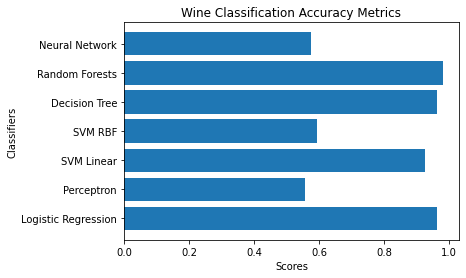

In [98]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [acc_logre_nonorm, acc_perc_nonorm, acc_svm_lk_nonorm, acc_svm_rbf_nonorm, acc_dtree_nonorm, acc_rforest_nonorm, acc_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wine Classification Accuracy Metrics')
plt.show()


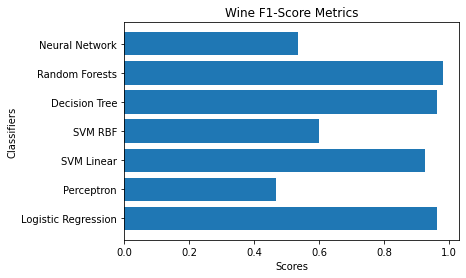

In [99]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [f1_logre_nonorm, f1_perc_nonorm, f1_svm_lk_nonorm, f1_svm_rbf_nonorm, f1_dtree_nonorm, f1_rforest_nonorm, f1_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wine F1-Score Metrics')
plt.show()


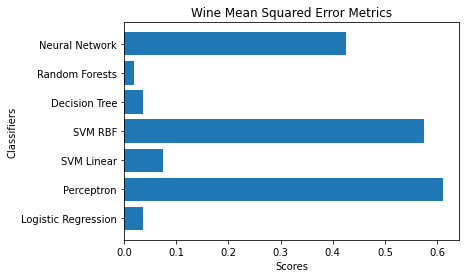

In [100]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [mse_logre_nonorm, mse_perc_nonorm, mse_svm_lk_nonorm, mse_svm_rbf_nonorm, mse_dtree_nonorm, mse_rforest_nonorm, mse_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wine Mean Squared Error Metrics')
plt.show()

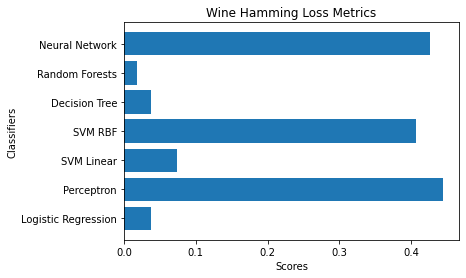

In [101]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [hamloss_logre_nonorm, hamloss_perc_nonorm, hamloss_svm_lk_nonorm, hamloss_svm_rbf_nonorm, hamloss_dtree_nonorm, hamloss_rforest_nonorm, hamloss_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wine Hamming Loss Metrics')
plt.show()

## Feature Standardization

### IRIS Classification Accuracy Metrics

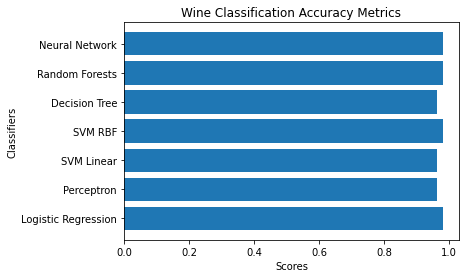

In [102]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [acc_logre_norm, acc_perc_norm, acc_svm_lk_norm, acc_svm_rbf_norm, acc_dtree_norm, acc_rforest_norm, acc_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wine Classification Accuracy Metrics')
plt.show()


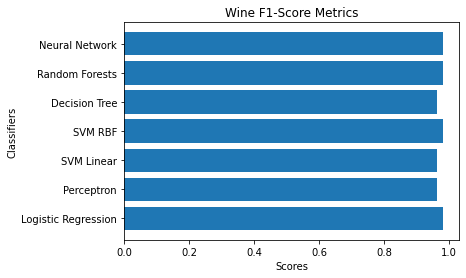

In [103]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [f1_logre_norm, f1_perc_norm, f1_svm_lk_norm, f1_svm_rbf_norm, f1_dtree_norm, f1_rforest_norm, f1_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wine F1-Score Metrics')
plt.show()


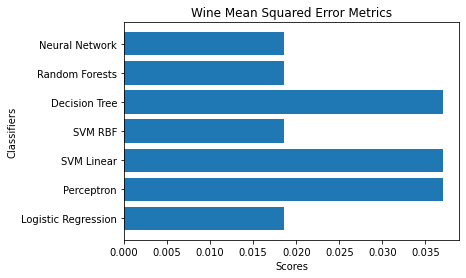

In [104]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [mse_logre_norm, mse_perc_norm, mse_svm_lk_norm, mse_svm_rbf_norm, mse_dtree_norm, mse_rforest_norm, mse_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wine Mean Squared Error Metrics')
plt.show()

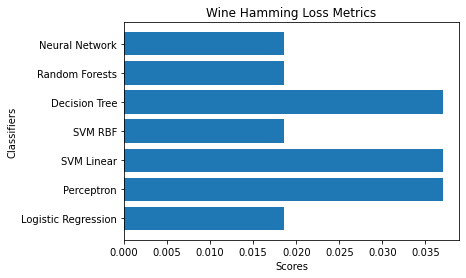

In [105]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [hamloss_logre_norm, hamloss_perc_norm, hamloss_svm_lk_norm, hamloss_svm_rbf_norm, hamloss_dtree_norm, hamloss_rforest_norm, hamloss_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('Wine Hamming Loss Metrics')
plt.show()

# Comparison plots of the classifiers' performance

### (Analysis in Notebook 7)

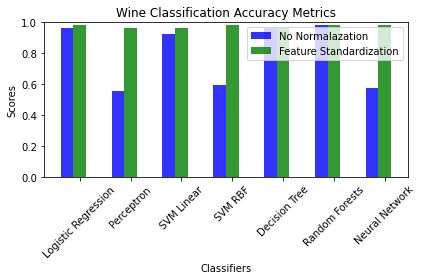

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 7
No_Normalazation = (acc_logre_nonorm, acc_perc_nonorm, acc_svm_lk_nonorm, acc_svm_rbf_nonorm, acc_dtree_nonorm, acc_rforest_nonorm, acc_nnet_nonorm)
Feature_Standardization = (acc_logre_norm, acc_perc_norm, acc_svm_lk_norm, acc_svm_rbf_norm, acc_dtree_norm, acc_rforest_norm, acc_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
plt.ylim(0.00, 1.0)

rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Wine Classification Accuracy Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'), rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

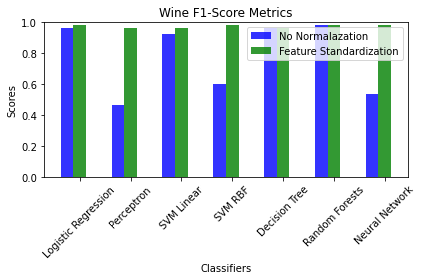

In [107]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (f1_logre_nonorm, f1_perc_nonorm, f1_svm_lk_nonorm, f1_svm_rbf_nonorm, f1_dtree_nonorm, f1_rforest_nonorm, f1_nnet_nonorm)
Feature_Standardization = (f1_logre_norm, f1_perc_norm, f1_svm_lk_norm, f1_svm_rbf_norm, f1_dtree_norm, f1_rforest_norm, f1_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
plt.ylim(0.00, 1.0)

rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Wine F1-Score Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'), rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

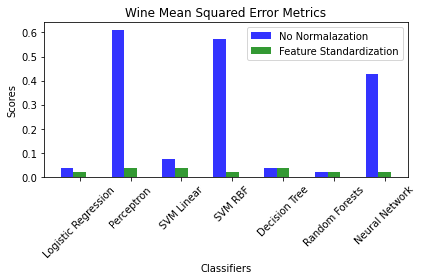

In [108]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (mse_logre_nonorm, mse_perc_nonorm, mse_svm_lk_nonorm, mse_svm_rbf_nonorm, mse_dtree_nonorm, mse_rforest_nonorm, mse_nnet_nonorm)
Feature_Standardization = (mse_logre_norm, mse_perc_norm, mse_svm_lk_norm, mse_svm_rbf_norm, mse_dtree_norm, mse_rforest_norm, mse_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8


rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Wine Mean Squared Error Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'), rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

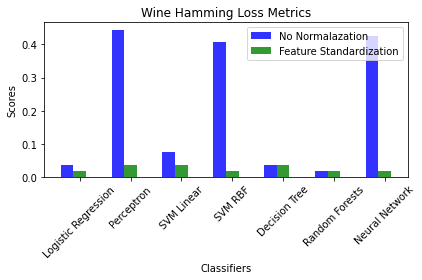

In [109]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (hamloss_logre_nonorm, hamloss_perc_nonorm, hamloss_svm_lk_nonorm, hamloss_svm_rbf_nonorm, hamloss_dtree_nonorm, hamloss_rforest_nonorm, hamloss_nnet_nonorm)
Feature_Standardization = (hamloss_logre_norm, hamloss_perc_norm, hamloss_svm_lk_norm, hamloss_svm_rbf_norm, hamloss_dtree_norm, hamloss_rforest_norm, hamloss_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8


rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Wine Hamming Loss Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'), rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()